In [1]:
import os 
import json
import pprint
import tweepy
import networkx.readwrite.gpickle as pkl

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Twitter API credentials
api_key = "qb57kzcuxez3RxyTaUEzHdzMS"
api_secret = "ntm3qGSazr1suCQKTYinoTxJciChIvHQs9nPTHDWuwLPd8vVSc"
access_token = "15750573-5Fk8qmqDhBXCqfYM7GnNLBUvGgOofb7mtywZs4OIC"
access_secret = "9w0CXnrZbye6Pq6jlVAgVU3IlAOVmGPSsvyZGj2Ki6XBW"
bearer_token = "AAAAAAAAAAAAAAAAAAAAALjZJQEAAAAAzXmqQ3tOay4wkGLRxk0OXkrCi%2Bo%3DiJEe5N5wAbEIEXJVZVktWfl0YGRAQKcvdRfzzWKZGawlzObzvB"

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
if(api.verify_credentials):
    print ('Authentication completed successfully!')

Authentication completed successfully!


In [4]:
users = ["Miccighel_"]

for user in users:
    print(f"Processing @{user}")

    user_followers = []

    for item in tweepy.Cursor(
            api.followers,
            screen_name=user,
            skip_status=True,
            include_user_entities=False
    ).items():
        user_followers.append(item._json)

    print(f"Found {len(user_followers)} followers for @{user}")
    s.serialize_json(f"{user}_following.json", user_followers)

In [5]:
#users = ["Miccighel_"]

#for user in users:
 #   print(f"Processing @{user}")

  #  user_friends = []

   # for item in tweepy.Cursor(
    #        api.friends,
     #       screen_name=user,
      #      skip_status=True,
       #     include_user_entities=False
    #).items():
     #   user_friends.append(item._json)

    #print(f"Found {len(user_friends)} friends for @{user}")
    #s.serialize_json(f"{user}_following.json", user_following)

In [6]:
import random
users = ["Miccighel_"]
for user in users:
    serializer = Serializer(f'data/{user}')
    json = serializer.read_json(f"{user}_followers.json")
    for count in range(0, 5):
        random_follower = random.choice(json)
        random_follower_screenName = random_follower["screen_name"]
        random_follower_id = random_follower["id"]
        random_follower_followers = []
        for item in tweepy.Cursor(
                api.followers,
                screen_name=random_follower_screenName,
                skip_status=True,
                include_user_entities=False
        ).items(10):
            found_follower = item._json
            random_follower_followers.append(found_follower)
        print(f"Found {len(random_follower_followers)} followers for @{random_follower_screenName}")
        serializer.serialize_json(f"random_{random_follower_id}_follower.json", random_follower_followers)

    json = serializer.read_json(f"{user}_following.json")
    for count in range(0, 5):
        random_friend = random.choice(json)
        random_friend_screenName = random_friend["screen_name"]
        random_friend_id = random_friend["id"]
        random_friend_friends = []
        for item in tweepy.Cursor(
                api.friends,
                screen_name=random_friend_screenName,
                skip_status=True,
                include_user_entities=False
        ).items(10):
            found_friend = item._json
            random_friend_friends.append(found_friend)
        print(f"@{random_friend} follows {len(random_friend_friends)} users")
        serializer.serialize_json(f"random_{random_friend_id}_following.json", random_friend_friends)

In [9]:
users = ["mizzaro"]

for user in users:
    print(f"Processing @{user}")

    user_followers = []

    for item in tweepy.Cursor(
            api.friends,
            screen_name=user,
            skip_status=True,
            include_user_entities=False
    ).items():
        user_followers.append(item._json)

    print(f"Found {len(user_followers)} following for @{user}")
    s.serialize_json(f"{user}/{user}_following.json", user_followers)

In [14]:
from pyvis.network import Network
import string

twitter = pkl.read_gpickle("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/graph/graph_networkx.pkl")

nt = Network(height="100%", width="100%", bgcolor="#111111", font_color="white", heading="Twitter Graph - Broken Edition")

print(len(list(twitter.nodes)))

node = list(twitter.nodes)#[:800]
twitter = twitter.subgraph(node)

print(len(list(twitter.nodes)))

nt.barnes_hut()
nt.from_nx(twitter)
neighbor_map = nt.get_adj_list()



for node in nt.nodes:
    #node["id"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    info= "nome utente: " + node["screen_name"] + "<br>"  + "id: " + node['id_str']
    node["value"] = len(neighbor_map[node["id"]])
    node['title'] = info
    node['label'] = node['name']
    if node['screen_name'] == 'damiano10':
        node['color'] = 'red'
    elif node['screen_name'] == 'eglu81':
        node['color'] = 'yellow'
    elif node['screen_name'] == 'mizzaro':
        node['color'] = 'blue'
    elif node['screen_name'] == 'Miccighel_':
        node['color'] = '#0fefff'
    elif node['screen_name'] == 'KevinRoitero':
        node['color'] = '#ff0fd3'

#for edge in nt.edges:
    #if edge["id"] = 
 #   if profile["name"].split("-")[0] == "Damiano" :
  #      edge_color="red"
   # elif profile["name"].split("-")[0] == "Gianluca" :
    #    edge_color="yellow"
    #elif profile["name"].split("-")[0] == "Kevin" :
     #   edge_color="green"
    #elif profile["name"].split("-")[0] == "Michael" :
     #   edge_color="blue"
    #elif profile["name"].split("-")[0] == "mizzaro" :
     #   edge_color="white"

#nt.set.options

nt.show("twitter.html")

3179
3179


KeyError: 'screen_name'

In [18]:
from pyvis.network import Network
import string

twitter = pkl.read_gpickle("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/graph/graph_networkx.pkl")

nt = Network(height="100%", width="100%", bgcolor="#111111", font_color="white", heading="Twitter Graph - Broken Edition")

nodesT = list(twitter.nodes)#[:200]
twitter = twitter.subgraph(nodesT)

nt.barnes_hut()
nt.from_nx(twitter)
neighbor_map = nt.get_adj_list()



for node in nodesT:
    #node["id"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    info= "nome utente: " + node['screen_name'] + ",<br>" + "<br>id: " + node['id_str']
    node["value"] = len(neighbor_map[node["id"]])
    node['title'] = info
    node['label'] = node['name']
    if node['screen_name'] == 'damiano10':
        node['color'] = 'red'
    elif node['screen_name'] == 'eglu81':
        node['color'] = 'yellow'
    elif node['screen_name'] == 'mizzaro':
        node['color'] = 'blue'
    elif node['screen_name'] == 'Miccighel_':
        node['color'] = '#0fefff'
    elif node['screen_name'] == 'KevinRoitero':
        node['color'] = '#ff0fd3'
nt.show("twitShape1.html")

TypeError: 'int' object is not subscriptable

In [8]:
from pyvis.network import Network
import string

twitter = pkl.read_gpickle("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/graph/graph_networkx.pkl")

nt = Network(height="100%", width="100%", bgcolor="#111111", font_color="white", heading="Twitter Graph - Broken Edition")

node = list(twitter.nodes)[:200]
twitter = twitter.subgraph(node)

nt.barnes_hut()#(gravity=-5000, central_gravity=0, spring_length=200, spring_strength=0.009, damping=0.025, overlap=0) #me li mette un po vicini il damping verso 1 credo #gravity ti mostra subito i nodi per bene
nt.from_nx(twitter)
neighbor_map = nt.get_adj_list()

nt.options.Layout(twitter, randomSeed=None, improvedLayout=True)



for node in nt.nodes:
    #node["id"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    info= "nome utente: " + node['screen_name'] + "<br>" + "id: " + node['id_str']
    node["value"] = len(neighbor_map[node["id"]])
    node['title'] = info
    node['label'] = node['name']
    node['shape'] = 'circularImage'
    node['image'] = node['profile_image_url_https']
    if node['screen_name'] == 'damiano10':
        node['color'] = 'red'
        node['mass'] = 50
        node['x'] = 500
        node['y'] = 50
    elif node['screen_name'] == 'eglu81':
        node['color'] = 'yellow'
        node['mass'] = 50
    elif node['screen_name'] == 'mizzaro':
        node['color'] = 'blue'
        node['mass'] = 50
    elif node['screen_name'] == 'Miccighel_':
        node['color'] = '#0fefff'
        node['mass'] = 50
    elif node['screen_name'] == 'KevinRoitero':
        node['color'] = '#ff0fd3'
        node['mass'] = 50
        
        
for edge in nt.edges:
    if edge['to'] == 132646210:
        edge['color'] = 'red'
    elif edge['to'] == 19659370:
        edge['color'] = 'yellow'
    elif edge['to'] == 18932422:
        edge['color'] = 'blue'
    elif edge['to'] == 15750573:
        edge['color'] = '#0fefff'
    elif edge['to'] == 3036907250:
        edge['color'] = '#ff0fd3'
    else:
        edge['color'] = 'white'

nt.show("twitShape2.html")

AttributeError: 'Options' object has no attribute 'Layout'

In [ ]:
# import
from pyvis import network as net

# make a pyvis network
twitter = pkl.read_gpickle("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/graph/graph_networkx.pkl")

pyvis_graph = Network(height="100%", width="100%", bgcolor="blue", font_color="red")
pyvis_graph.width = '1000px'
        # for each node and its attributes in the networkx graph
for node,node_attrs in twitter.nodes(data=True):
    pyvis_graph.add_node(node,**node_attrs)
    #         print(node,node_attrs)

        # for each edge and its attributes in the networkx graph
for source,target,edge_attrs in twitter.edges(data=True):
            # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
    if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
                # place at key 'value' the weight of the edge
        edge_attrs['value']=edge_attrs['weight']
            # add the edge
    pyvis_graph.add_edge(source,target,**edge_attrs)

        # turn buttons on


        # return and also save
pyvis_graph.show("testOutput.html")


In [ ]:
#neighbor_map = nt.get_adj_list()
#print(neighbor_map)

#for node in nt.nodes:
 #   print(node['id'])
    
for node in nt.nodes:
    node["value"] = len(neighbor_map[node['id']])
    print(node['value'], node['screen_name'])


In [ ]:
print(G.nodes.data())

In [5]:
from serializer import*
#s = Serializer("data")

In [ ]:
#serializer = Serializer(f'data/{user}')

In [6]:
def get_friendship(sourceid, targetid, api):
    kind = ""

    friendship = api.show_friendship(source_id=sourceid, target_id=targetid)

    if not friendship[0].following and not friendship[0].followed_by:
        kind = "none"
    elif not friendship[0].following and friendship[0].followed_by:
        kind = "r_l"
    elif friendship[0].following and not friendship[0].followed_by:
        kind = "l_r"
    else:
        kind = "bi"

    return {
        "source_id": sourceid,
        "target_id": targetid,
        "friendship": kind
    }

accounts = ["eglu81"]
serializer = Serializer("data")
users = serializer.read_json("all_users.json")
edges = []
print("processing")
for account in accounts:
    serializer = Serializer(f'data/{account}')
    account_json = serializer.read_json(f"{account}_profile.json")
    account_id = account_json["id"]
    for user in users:
        if user["id"] is not account_id:
            edges.append(get_friendship(account_id, user["id"], api))
            
    serializer.serialize_json(f'{account}_friendships.json', edges)

Data read from path: data/all_users.json
processing
Data read from path: data/eglu81/eglu81_profile.json


Rate limit reached. Sleeping for: 818
Rate limit reached. Sleeping for: 817
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 823
Rate limit reached. Sleeping for: 821
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 817
Rate limit reached. Sleeping for: 822
Rate limit reached. Sleeping for: 818
Rate limit reached. Sleeping for: 823


TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

In [54]:
import os
from serializer import*

directory = "data"
G = nx.DiGraph(membri=["Lorenzo Bellina" "Francesco Bombassei De Bona", "Andrea Cantarutti", "Gabriele Dominici"])
for dirname in os.listdir(directory):
    if not dirname.startswith(".") and dirname == "damiano10":
        print(f"Analizzo {dirname}")
        s = Serializer(f"data/{dirname}")
        profile = s.read_json(f"{dirname}_profile.json")
        G.add_node(profile["screen_name"], **profile, color='gold')
        print(f'Aggiungo il nodo {profile["name"]}')
        
        followers = s.read_json(f"{dirname}_followers.json")
        print(f'Aggiungo i {len(followers)} followers di {profile["name"]}')
        for item in followers:
            G.add_node(item["screen_name"], **item, color='red')
            G.add_edge(item["screen_name"], profile["screen_name"])

        following = s.read_json(f"{dirname}_following.json")
        print(f'Aggiungo i {len(following)} following di {profile["name"]}')
        for item in following:
            G.add_node(item["screen_name"], **item, color='blue')
            G.add_edge(profile["screen_name"], item["screen_name"])

#        followers = s.read_json(f"{dirname}_followers.json")
 #       print(f'Aggiungo i {len(followers)} followers di {profile["name"]}')
  #      for item in followers:
   #         if(item['id'] == 19659370 or item['id'] == 3036907250 or item['id'] == 15750573 or item['id'] == 18932422):
    #            G.add_node(item['screen_name'], weight=3, **item)
     #           G.add_edge(item["screen_name"], profile["screen_name"]) #id e id
      #      else:
       #         G.add_node(item["screen_name"], weight= 1, **item)
        #        G.add_edge(item["screen_name"], profile["screen_name"])

#        following = s.read_json(f"{dirname}_following.json")
 #       print(f'Aggiungo i {len(following)} following di {profile["name"]}')
  #      for item in following:
   #         if(item['id'] == 19659370 or item['id'] == 3036907250 or item['id'] == 15750573 or item['id'] == 18932422):
    #            G.add_node(item['screen_name'], weight=3, **item)
     #           G.add_edge(item["screen_name"], profile["screen_name"]) #id e id
      #      else:
       #         G.add_node(item["screen_name"], weight= 1, **item)
        #        G.add_edge(item["screen_name"], profile["screen_name"])

        print(f'Inserisco i random di {profile["name"]}')
        temp_dir = directory+"/"+dirname
        for file in os.listdir(temp_dir):
            if file.startswith("random"):
                id_user = int(file.split("_")[1])
                if file.endswith("following.json"):
                    following = s.read_json(f"{file}")
                    print(f"Inserisco i {len(following)} following del random di id {id_user}")
                    for item in following:
                        G.add_node(item["screen_name"], **item, color= 'blue') #, weight= 1, **item)
                        G.add_edge(id_user, item["screen_name"])
                elif file.endswith("follower.json"):
                    followers = s.read_json(f"{file}")
                    print(f"Inserisco i {len(followers)} followers del random di id {id_user}")
                    for item in followers:
                        G.add_node(item["screen_name"], **item, color = 'red') #, weight=1, **item)
                        G.add_edge(item["screen_name"], id_user)
        node_it = G.in_degree()
        for (node, in_degree) in node_it:
            G.nodes[node]["follower_finded"] = in_degree 
            
nx.write_gpickle(G, "graph/d10_graph_networkx2.pkl")

Analizzo damiano10
Data read from path: data/damiano10/damiano10_profile.json
Aggiungo il nodo Damiano Spina
Data read from path: data/damiano10/damiano10_followers.json
Aggiungo i 786 followers di Damiano Spina
Data read from path: data/damiano10/damiano10_following.json
Aggiungo i 836 following di Damiano Spina
Inserisco i random di Damiano Spina
Data read from path: data/damiano10/random_1217315090_following.json
Inserisco i 10 following del random di id 1217315090
Data read from path: data/damiano10/random_2153743237_following.json
Inserisco i 10 following del random di id 2153743237
Data read from path: data/damiano10/random_989428140433866752_following.json
Inserisco i 10 following del random di id 989428140433866752
Data read from path: data/damiano10/random_81875677_following.json
Inserisco i 10 following del random di id 81875677
Data read from path: data/damiano10/random_3341697257_follower.json
Inserisco i 10 followers del random di id 3341697257
Data read from path: data/da

In [40]:
#print(G.nodes)

In [59]:
#print(damiano10_graph.nodes)

1245
1768
ok


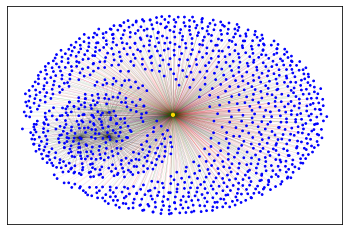

In [58]:
############## PER ORA IL MIGLIORE

import matplotlib.pyplot as plt
import networkx as nx

#G = nx.cubical_graph()

damiano10_graph = pkl.read_gpickle("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/graph/graph_networkx.pkl")
d10_reduced_graph = nx.ego_graph(damiano10_graph, 132646210 , radius=1, center= True, distance='weight')
print(d10_reduced_graph.number_of_nodes())
print(d10_reduced_graph.number_of_edges())

        
        
pos = nx.spring_layout(d10_reduced_graph)  # positions for all nodes

# nodes
#if node == 132646210 :
 #   options = {"node_size":10, "alpha": 0.8, node_color:'gold'}
#else:
#    options = {"node_size": 5, "alpha": 0.8}


#nx.draw_networkx_nodes(d10_reduced_graph, pos, node_color="b", node_size=5)


# edges

#for items in nx.edges:
 #   if edge['to'] == 132646210:
  #      edge['color'] = 'red'
   # else:
    #    edge['color'] = 'green'
    
color_ed=[]
        
for items in d10_reduced_graph.edges:
    if items[1] == 132646210 or items[0] == 132646210:
        if d10_reduced_graph[items[0]][items[1]]['value'] == 'bi':  
            color_ed.append('purple')
        elif d10_reduced_graph[items[0]][items[1]]['value'] == 'r_l':
            color_ed.append('red')
        else:
            color_ed.append('green')
    else:
        color_ed.append('black')

nx.draw_networkx_edges(d10_reduced_graph, pos, width=0.1, alpha=0.5, edge_color=color_ed)#, edge_color='green')






#nx.draw_networkx_labels(d10_reduced_graph, pos, labels, font_size=6)

# Draw ego as large and red
options = {"node_size": 10, "node_color": "gold"}

color=[]
size=[]

for items in d10_reduced_graph.nodes:
    if items == 132646210 :
        print('ok')
        color.append('gold')
        size.append(20)
    else:
        color.append('blue')
        size.append(3)
        
nx.draw_networkx_nodes(d10_reduced_graph, pos, node_color=color, node_size=size)

#plt.axis("off")


plt.savefig("/Users/lorenzobellina/Documents/GitHub/ProgettoSocialComputing/damiano10_ego_graph.pdf")
plt.show()
plt.close()

ok


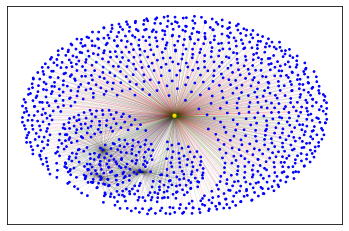

In [11]:
from pyvis.network import Network
import string

damiano10_graph = pkl.read_gpickle("graph/graph_networkx.pkl")
d10_reduced_graph = nx.ego_graph(damiano10_graph, 132646210 , radius=1, center= True, distance='weight')

pos = nx.spring_layout(d10_reduced_graph)  # positions for all nodes
    
color_ed=[]
        
for items in d10_reduced_graph.edges:
    if items[1] == 132646210 or items[0] == 132646210:
        if d10_reduced_graph[items[0]][items[1]]['value'] == 'bi':  
            color_ed.append('purple')
        elif d10_reduced_graph[items[0]][items[1]]['value'] == 'r_l':
            color_ed.append('red')
        else:
            color_ed.append('green')
    else:
        color_ed.append('black')

nx.draw_networkx_edges(d10_reduced_graph, pos, width=0.1, alpha=0.5, edge_color=color_ed)#, edge_color='green')






#nx.draw_networkx_labels(d10_reduced_graph, pos, labels, font_size=6)


color=[]
size=[]

for items in d10_reduced_graph.nodes:
    if items == 132646210 :
        print('ok')
        color.append('gold')
        size.append(10)
    else:
        color.append('blue')
        size.append(3)
        
nx.draw_networkx_nodes(d10_reduced_graph, pos, node_color=color, node_size=size)


####     pyvis


nt = Network(height="100%", width="100%", bgcolor="#111111", font_color="white", heading="Damiano10 Graph - Broken Edition")

node = list(d10_reduced_graph.nodes)
d10_reduced_graph = d10_reduced_graph.subgraph(node)

nt.barnes_hut()#(gravity=-5000, central_gravity=0, spring_length=200, spring_strength=0.009, damping=0.025, overlap=0) #me li mette un po vicini il damping verso 1 credo #gravity ti mostra subito i nodi per bene
nt.from_nx(d10_reduced_graph)
neighbor_map = nt.get_adj_list()

#nt.options.Layout(twitter, randomSeed=None, improvedLayout=True)

In [12]:
profs = ["Miccighel_", "mizzaro", "damiano10", "eglu81", "KevinRoitero"]

# Building the nodes
for node in nt.nodes:
    #node["id"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    info= "nome utente: " + node['screen_name'] + "<br>" + "id: " + str(node['id'])
    map_length = len(neighbor_map[node["id"]])
    node["value"] = map_length
    node['title'] = info
    node['label'] = node['name']
    if node['screen_name'] in profs:
        node['shape'] = 'circularImage'
        node['image'] = node['profile_image_url_https']
        node['mass'] = map_length
        
# Edges color
for edge in nt.edges:
    if edge['to'] == 132646210:
        edge['color'] = 'red'
    elif edge['from'] == 132646210:
        edge['color'] = 'green'
    else:
        edge['color'] = '#5dbcef'


nt.show("d10.html")